In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [2]:
filepath = '../input/titanic/train.csv'
ttest = pd.read_csv('../input/titanic/test.csv')
tdata = pd.read_csv(filepath)
tdata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
ttest.head().T

,0,1,2,3,4
PassengerId,892,893,894,895,896
Pclass,3,3,2,3,3
Name,"Kelly, Mr. James","Wilkes, Mrs. James (Ellen Needs)","Myles, Mr. Thomas Francis","Wirz, Mr. Albert","Hirvonen, Mrs. Alexander (Helga E Lindqvist)"
Sex,male,female,male,male,female
Age,34.5,47,62,27,22
SibSp,0,1,0,0,1
Parch,0,0,0,0,1
Ticket,330911,363272,240276,315154,3101298
Fare,7.8292,7,9.6875,8.6625,12.2875
Cabin,NaN,NaN,NaN,NaN,NaN


In [4]:
tdata.shape

(891, 12)

In [5]:
tdata.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
null_columns=tdata.columns[tdata.isnull().any()]
null_columns

tdata.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
ttest.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

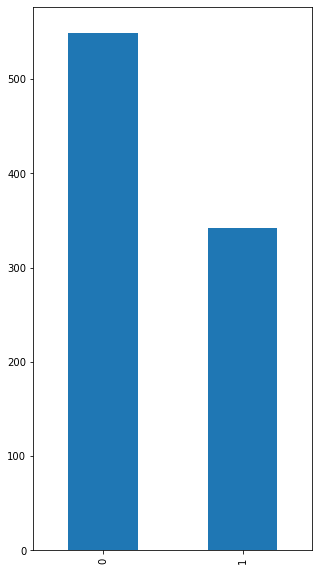

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,10))
tdata.Survived.value_counts().plot(kind="bar",alpha=1) ##alpha is the value of trnasperency of bar graph.1 is dark and 0.1 light

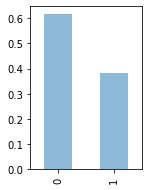

In [9]:
fig = plt.figure(figsize=(2,3))
tdata.Survived.value_counts(normalize = True).plot(kind ="bar",alpha = 0.5)

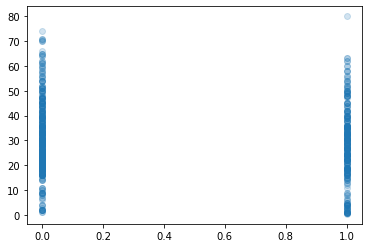

In [10]:
plt.scatter(tdata.Survived, tdata.Age, alpha = 0.2)

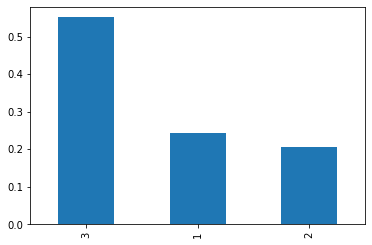

In [11]:
tdata.Pclass.value_counts(normalize = True).plot(kind ="bar",alpha = 1)

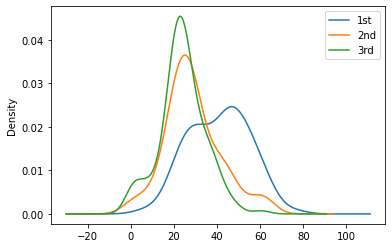

In [12]:
for x in [1,2,3]:
    ttest.Age[ttest.Pclass == x].plot(kind ="kde", alpha = 1)
plt.legend(("1st","2nd","3rd"))    




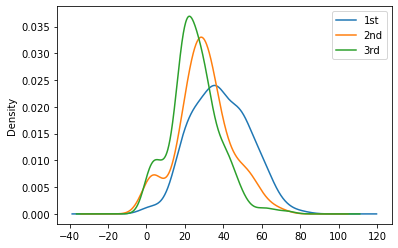

In [13]:
for x in [1,2,3]:
    tdata.Age[tdata.Pclass == x].plot(kind ="kde", alpha = 1)
plt.legend(("1st","2nd","3rd")) 

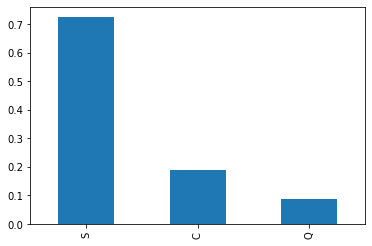

In [14]:
tdata.Embarked.value_counts(normalize = True).plot(kind ="bar", alpha = 1)

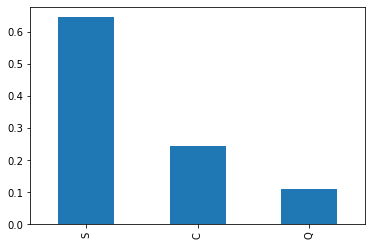

In [15]:
ttest.Embarked.value_counts(normalize = True).plot(kind ="bar", alpha = 1)

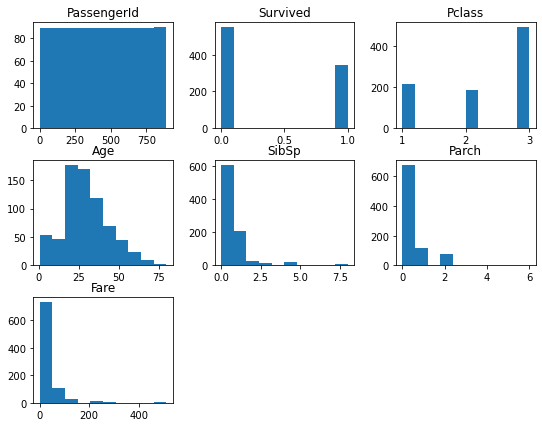

In [16]:
tdata.hist(bins = 10,figsize=(9,7),grid =False);


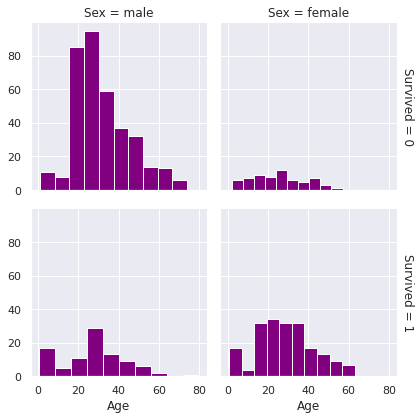

In [17]:
import seaborn as sns
sns.set(font_scale=1)
g = sns.FacetGrid(tdata, col="Sex", row="Survived", margin_titles=True)
g.map(plt.hist, "Age",color="purple");

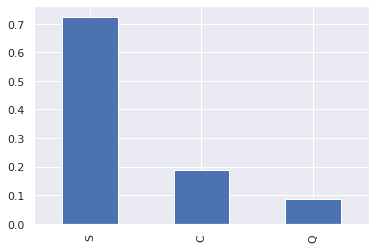

In [18]:
tdata.Embarked.value_counts(normalize = True).plot(kind ="bar", alpha = 1)

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


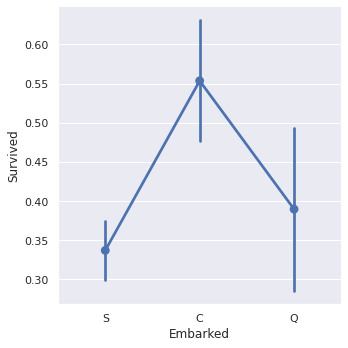

In [19]:
sns.factorplot(x = 'Embarked',y="Survived", data = tdata,color="b");

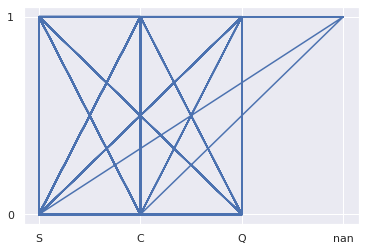

In [20]:
import matplotlib.pyplot as plt

plt.plot((tdata.Embarked).astype(str),(tdata.Survived).astype(str))

plt.show()

<BarContainer object of 891 artists>

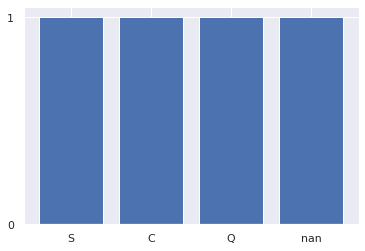

In [21]:
plt.bar((tdata.Embarked).astype(str),(tdata.Survived).astype(str))

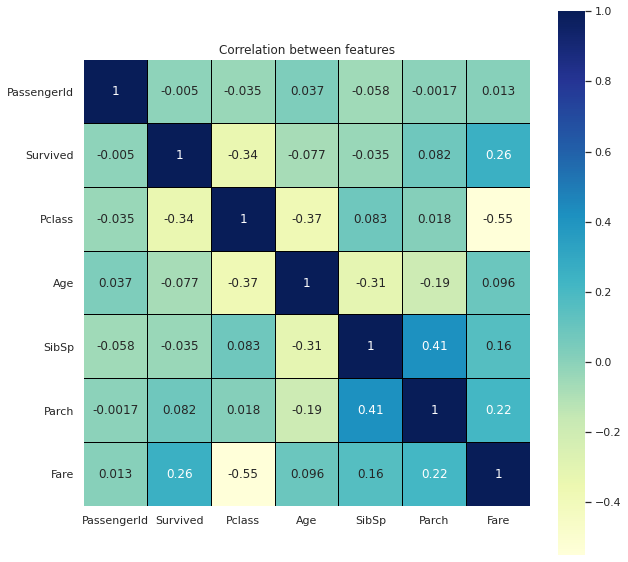

In [22]:
corr=tdata.corr()#["Survived"]
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=1, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features');

In [23]:
tdata.corr()["Survived"]

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

In [24]:
tdata[tdata['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


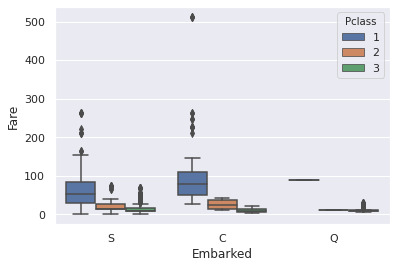

In [25]:
sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=tdata);

In [26]:
tdata["Embarked"] = tdata["Embarked"].fillna('C')

In [27]:
tdata[tdata['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [28]:
tdata[tdata['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [29]:
tdata.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [30]:
ttest[ttest['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [31]:
def fill(df):
    mf = df[(df['Pclass'] == 3) & (df['Embarked']=='S')]['Fare'].median()
    df['Fare'] = df['Fare'].fillna(mf)
    return df

ttest = fill(ttest)

In [32]:
ttest.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.561214
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.856789
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.471875
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [33]:
tdata['Deck'] = tdata.Cabin.str[0]
tdata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN


In [34]:
ttest['Deck'] = ttest.Cabin.str[0]

In [35]:
tdata['Deck']

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Deck, Length: 891, dtype: object

In [36]:
tdata["Deck"].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


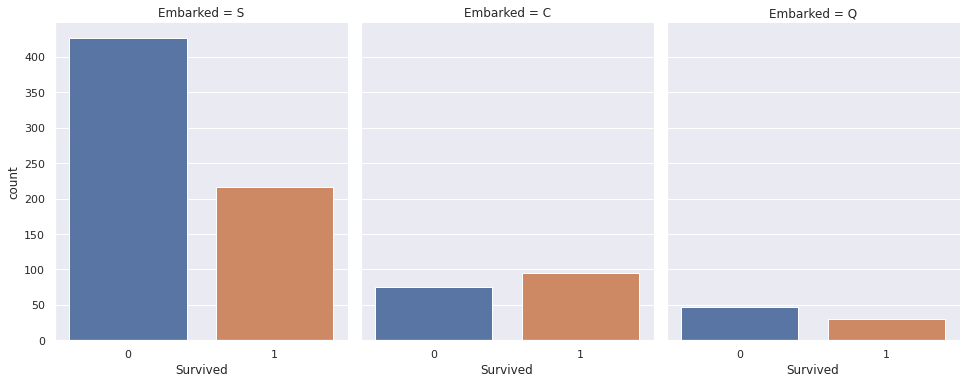

In [37]:
g = sns.factorplot("Survived", col="Embarked", col_wrap=4,
                    data=tdata[tdata.Embarked.notnull()],
                    kind="count", height=5.5, aspect=.8);

In [38]:
tdata.Deck.fillna('Z', inplace=True)
ttest.Deck.fillna('Z', inplace=True)
tdata["Deck"].unique()

array(['Z', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [39]:
tdata['FamilySize']=tdata['SibSp']+tdata['Parch']+1
ttest['FamilySize']=ttest['SibSp']+ttest['Parch']+1
print(tdata['FamilySize'].value_counts())
tdata.head()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Z,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Z,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Z,1


In [40]:
tdata.loc[tdata['FamilySize']==1, 'FsizeD'] = 'singleton'
tdata.loc[tdata['FamilySize']>1 & (tdata['FamilySize']<5), 'FsizeD'] = 'small'
tdata.loc[tdata['FamilySize']>4, 'FsizeD']='large'
tdata.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,FamilySize,FsizeD
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Z,2,small
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,2,small
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Z,1,singleton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,2,small
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Z,1,singleton


In [41]:
ttest.loc[ttest['FamilySize']==1, 'FsizeD'] = 'singleton'
ttest.loc[ttest['FamilySize']>1 & (ttest['FamilySize']<5), 'FsizeD'] = 'small'
ttest.loc[ttest['FamilySize']>4, 'FsizeD']='large'
ttest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,FamilySize,FsizeD
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Z,1,singleton
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Z,2,small
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Z,1,singleton
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Z,1,singleton
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Z,3,small


In [42]:
print(tdata['FsizeD'].unique())
tdata['FsizeD'].value_counts()

['small' 'singleton' 'large']


singleton    537
small        292
large         62
Name: FsizeD, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


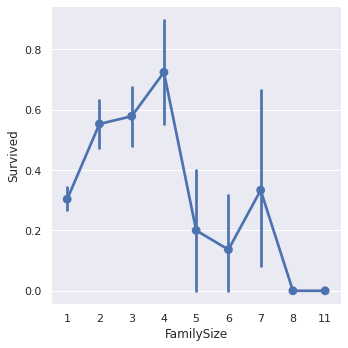

In [43]:
sns.factorplot(x = 'FamilySize',y="Survived", data = tdata,color="b");

In [44]:
tdata['NameLength'] = tdata['Name'].str.len()
tdata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,FamilySize,FsizeD,NameLength
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Z,2,small,23
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,2,small,51
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Z,1,singleton,22
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,2,small,44
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Z,1,singleton,24


In [45]:
tdata['NameLength'].value_counts()

19    64
25    55
27    50
18    50
26    49
28    43
24    43
17    42
21    40
23    39
20    39
22    38
30    37
29    32
31    30
16    26
32    23
33    22
15    15
47    11
37    10
38     9
36     9
39     9
45     9
44     8
41     8
34     7
46     7
40     7
51     7
35     6
43     5
42     5
49     5
50     4
52     4
56     3
14     3
48     3
13     2
12     2
53     2
55     2
57     2
67     1
54     1
61     1
65     1
82     1
Name: NameLength, dtype: int64

In [46]:
ttest['NameLength'] = ttest['Name'].str.len()
ttest.head()
ttest['NameLength'].value_counts()

25    28
20    27
24    26
18    25
26    24
28    22
17    21
27    20
19    18
21    18
22    17
29    15
30    14
23    14
16    13
31    10
44     8
15     8
37     8
38     6
35     6
39     5
36     5
41     5
46     5
47     5
48     5
33     4
40     3
32     3
45     3
51     3
42     3
63     2
43     2
49     2
52     2
53     2
54     2
59     2
13     2
34     1
62     1
55     1
58     1
14     1
Name: NameLength, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


['okay', 'good', 'short', 'long']
Categories (4, object): ['short' < 'okay' < 'good' < 'long']


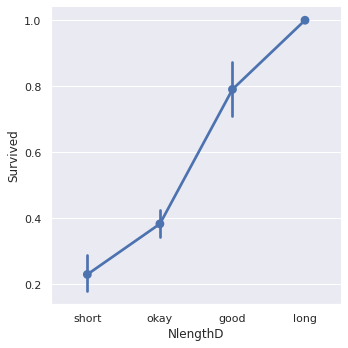

In [47]:
bins = [0, 20, 40, 57, 85]
group_names = ['short', 'okay', 'good', 'long']
tdata['NlengthD'] = pd.cut(tdata['NameLength'], bins, labels=group_names)
ttest['NlengthD'] = pd.cut(ttest['NameLength'], bins, labels=group_names)

sns.factorplot(x="NlengthD", y="Survived", data=tdata)
print(tdata["NlengthD"].unique())

In [48]:
import re
def gtitles(names):
    stitles = re.search('([A-Za-z]+)\.',names)
    
    if stitles:
        return stitles.group(1)
    return ""
titles = tdata['Name'].apply(gtitles)
titles.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Countess      1
Sir           1
Capt          1
Mme           1
Lady          1
Don           1
Ms            1
Jonkheer      1
Name: Name, dtype: int64

In [49]:
titles.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [50]:
tdata['Titles'] = titles

In [51]:
raretitle = ['Don', 'Rev', 'Dr','Major', 'Lady', 'Sir','Col', 'Capt', 'Countess','Jonkheer','Dona']
tdata.loc[tdata['Titles'] == 'Mme','Titles'] = 'Miss' 
tdata.loc[tdata["Titles"] == "Mlle", "Titles"] = 'Miss'
tdata.loc[tdata["Titles"] == "Ms", "Titles"] = 'Miss'
tdata.loc[tdata['Titles'] == 'Don','Titles'] = 'Rare Title' 
tdata.loc[tdata["Titles"] == "Rev", "Titles"] = 'Rare Title'
tdata.loc[tdata["Titles"] == "Dr", "Titles"] = 'Rare Title'
tdata.loc[tdata['Titles'] == 'Major','Titles'] = 'Rare Title' 
tdata.loc[tdata["Titles"] == "Lady", "Titles"] = 'Rare Title'
tdata.loc[tdata["Titles"] == "Sir", "Titles"] = 'Rare Title'
tdata.loc[tdata['Titles'] == 'Col','Titles'] = 'Rare Title'
tdata.loc[tdata['Titles'] == 'Capt','Titles'] = 'Rare Title'
tdata.loc[tdata['Titles'] == 'Countess','Titles'] = 'Rare Title'
tdata.loc[tdata['Titles'] == 'Jonkheer','Titles'] = 'Rare Title'
tdata.loc[tdata['Titles'] == 'Dona','Titles'] = 'Rare Title'
tdata['Titles'].value_counts()

Mr            517
Miss          186
Mrs           125
Master         40
Rare Title     23
Name: Titles, dtype: int64

In [52]:
titles_ttest = ttest['Name'].apply(gtitles)
titles_ttest.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dona        1
Dr          1
Name: Name, dtype: int64

In [53]:
ttest['Titles'] = titles_ttest
raretitle = ['Don', 'Rev', 'Dr','Major', 'Lady', 'Sir','Col', 'Capt', 'Countess','Jonkheer','Dona']
ttest.loc[ttest['Titles'] == 'Mme','Titles'] = 'Miss' 
ttest.loc[ttest["Titles"] == "Mlle", "Titles"] = 'Miss'
ttest.loc[ttest["Titles"] == "Ms", "Titles"] = 'Miss'
ttest.loc[ttest['Titles'] == 'Don','Titles'] = 'Rare Title' 
ttest.loc[ttest["Titles"] == "Rev", "Titles"] = 'Rare Title'
ttest.loc[ttest["Titles"] == "Dr", "Titles"] = 'Rare Title'
ttest.loc[ttest['Titles'] == 'Major','Titles'] = 'Rare Title' 
ttest.loc[ttest["Titles"] == "Lady", "Titles"] = 'Rare Title'
ttest.loc[ttest["Titles"] == "Sir", "Titles"] = 'Rare Title'
ttest.loc[ttest['Titles'] == 'Col','Titles'] = 'Rare Title'
ttest.loc[ttest['Titles'] == 'Capt','Titles'] = 'Rare Title'
ttest.loc[ttest['Titles'] == 'Countess','Titles'] = 'Rare Title'
ttest.loc[ttest['Titles'] == 'Jonkheer','Titles'] = 'Rare Title'
ttest.loc[ttest['Titles'] == 'Dona','Titles'] = 'Rare Title'
ttest['Titles'].value_counts()

Mr            240
Miss           79
Mrs            72
Master         21
Rare Title      6
Name: Titles, dtype: int64

In [54]:
tdata['Ticket'].tail()

886        211536
887        112053
888    W./C. 6607
889        111369
890        370376
Name: Ticket, dtype: object

In [55]:
tdata["TicketNumber"] = tdata["Ticket"].str.extract('(\d{2,})', expand=True)
tdata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,FamilySize,FsizeD,NameLength,NlengthD,Titles,TicketNumber
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Z,2,small,23,okay,Mr,21171
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,2,small,51,good,Mrs,17599
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Z,1,singleton,22,okay,Miss,3101282
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,2,small,44,good,Mrs,113803
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Z,1,singleton,24,okay,Mr,373450


In [56]:
tdata['TicketNumber'].value_counts()

347082     7
1601       7
2343       7
3101295    6
2144       6
          ..
65303      1
349216     1
2650       1
113787     1
13213      1
Name: TicketNumber, Length: 677, dtype: int64

In [57]:
tdata["TicketNumber"] = tdata["TicketNumber"].apply(pd.to_numeric)

In [58]:
tdata['TicketNumber'].value_counts()

2343.0       7
347082.0     7
1601.0       7
3101295.0    6
2144.0       6
            ..
237671.0     1
17475.0      1
248731.0     1
2625.0       1
2152.0       1
Name: TicketNumber, Length: 677, dtype: int64

In [59]:
tdata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,FamilySize,FsizeD,NameLength,NlengthD,Titles,TicketNumber
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Z,2,small,23,okay,Mr,21171.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,2,small,51,good,Mrs,17599.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Z,1,singleton,22,okay,Miss,3101282.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,2,small,44,good,Mrs,113803.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Z,1,singleton,24,okay,Mr,373450.0


In [60]:
ttest["TicketNumber"] = ttest["Ticket"].str.extract('(\d{2,})', expand=True)
ttest["TicketNumber"] = ttest["TicketNumber"].apply(pd.to_numeric)

In [61]:
tdata[tdata['TicketNumber'].isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,FamilySize,FsizeD,NameLength,NlengthD,Titles,TicketNumber
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,Z,1,singleton,19,short,Mr,NaN
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,Z,1,singleton,28,okay,Mr,NaN
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,Z,1,singleton,31,okay,Mr,NaN
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,Z,1,singleton,19,short,Mr,NaN
772,773,0,2,"Mack, Mrs. (Mary)",female,57.0,0,0,S.O./P.P. 3,10.5,E77,S,E,1,singleton,17,short,Mrs,NaN
841,842,0,2,"Mudd, Mr. Thomas Charles",male,16.0,0,0,S.O./P.P. 3,10.5,NaN,S,Z,1,singleton,24,okay,Mr,NaN


In [62]:
tdata.TicketNumber.fillna(tdata['TicketNumber'].median(), inplace = True)
ttest.TicketNumber.fillna(tdata['TicketNumber'].median(), inplace = True)

In [63]:
tdata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,FamilySize,FsizeD,NameLength,NlengthD,Titles,TicketNumber
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Z,2,small,23,okay,Mr,21171.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,2,small,51,good,Mrs,17599.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Z,1,singleton,22,okay,Miss,3101282.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,2,small,44,good,Mrs,113803.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Z,1,singleton,24,okay,Mr,373450.0


In [64]:
tdata[tdata['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,FamilySize,FsizeD,NameLength,NlengthD,Titles,TicketNumber
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Z,1,singleton,16,short,Mr,330877.0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,Z,1,singleton,28,okay,Mr,244373.0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,Z,1,singleton,23,okay,Mrs,2649.0
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,Z,1,singleton,23,okay,Mr,2631.0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,Z,1,singleton,29,okay,Miss,330959.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,Z,1,singleton,16,short,Mr,2629.0
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,Z,11,large,33,okay,Miss,2343.0
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,Z,1,singleton,27,okay,Mr,345777.0
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,Z,1,singleton,18,short,Mr,349217.0


In [65]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelEnc=LabelEncoder()
cat_vars=['Embarked','Sex',"Titles","FsizeD","NlengthD",'Deck']
for col in cat_vars:
    tdata[col]=labelEnc.fit_transform(tdata[col])
    ttest[col]=labelEnc.fit_transform(ttest[col])

tdata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,FamilySize,FsizeD,NameLength,NlengthD,Titles,TicketNumber
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,8,2,2,23,2,2,21171.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,2,2,2,51,0,3,17599.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,8,1,1,22,2,1,3101282.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,2,2,2,44,0,3,113803.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,8,1,1,24,2,2,373450.0


In [66]:
tdata1 = tdata
tdata1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,FamilySize,FsizeD,NameLength,NlengthD,Titles,TicketNumber
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,8,2,2,23,2,2,21171.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,2,2,2,51,0,3,17599.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,8,1,1,22,2,1,3101282.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,2,2,2,44,0,3,113803.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,8,1,1,24,2,2,373450.0


In [67]:
ttest1 = ttest
ttest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,FamilySize,FsizeD,NameLength,NlengthD,Titles,TicketNumber
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,1,7,1,1,16,3,2,330911.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,2,7,2,2,32,2,3,363272.0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,1,7,1,1,25,2,2,240276.0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,2,7,1,1,16,3,2,315154.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,2,7,3,2,44,0,3,3101298.0


In [68]:
tdata1['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [69]:
tdata1.corr()['Survived']

PassengerId    -0.005007
Survived        1.000000
Pclass         -0.338481
Sex            -0.543351
Age            -0.077221
SibSp          -0.035322
Parch           0.081629
Fare            0.257307
Embarked       -0.174199
Deck           -0.301116
FamilySize      0.016639
FsizeD          0.283810
NameLength      0.332350
NlengthD       -0.312234
Titles         -0.074812
TicketNumber   -0.096161
Name: Survived, dtype: float64

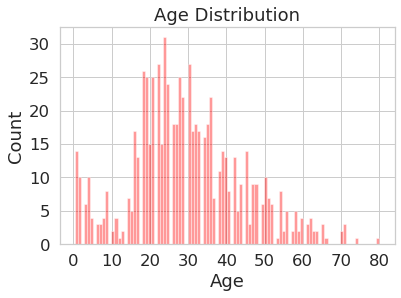

In [70]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(tdata["Age"].dropna(),
                 bins=100,
                 kde=False,
                 color="red")
    plt.title("Age Distribution")
    plt.ylabel("Count");

In [71]:
tdata[tdata['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,FamilySize,FsizeD,NameLength,NlengthD,Titles,TicketNumber
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,1,8,1,1,16,3,2,330877.0
17,18,1,2,"Williams, Mr. Charles Eugene",1,NaN,0,0,244373,13.0000,NaN,2,8,1,1,28,2,2,244373.0
19,20,1,3,"Masselmani, Mrs. Fatima",0,NaN,0,0,2649,7.2250,NaN,0,8,1,1,23,2,3,2649.0
26,27,0,3,"Emir, Mr. Farred Chehab",1,NaN,0,0,2631,7.2250,NaN,0,8,1,1,23,2,2,2631.0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",0,NaN,0,0,330959,7.8792,NaN,1,8,1,1,29,2,1,330959.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",1,NaN,0,0,2629,7.2292,NaN,0,8,1,1,16,3,2,2629.0
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",0,NaN,8,2,CA. 2343,69.5500,NaN,2,8,11,0,33,2,1,2343.0
868,869,0,3,"van Melkebeke, Mr. Philemon",1,NaN,0,0,345777,9.5000,NaN,2,8,1,1,27,2,2,345777.0
878,879,0,3,"Laleff, Mr. Kristo",1,NaN,0,0,349217,7.8958,NaN,2,8,1,1,18,3,2,349217.0


In [72]:
from sklearn.ensemble import RandomForestRegressor

def fill_missing_age(df):
    
    #Feature set
    age_df = df[['Age','Embarked','Fare','Parch','SibSp','TicketNumber','Titles','Pclass','FamilySize','FsizeD','NameLength','NlengthD','Deck']]
    train = age_df.loc[(df.Age.notnull())]
    test = age_df.loc[(df.Age.isnull())]
    y = train.values[:, 0]
    X = train.values[:, 1::]
    
    # Create and fit a model
    rtr = RandomForestRegressor(n_estimators=2000, n_jobs=-1)
    rtr.fit(X, y)
    
    # Use the fitted model to predict the missing values
    predictedAges = rtr.predict(test.values[:, 1::])
    
    # Assign those predictions to the full data set
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 
    
    return df
        
tdata = fill_missing_age(tdata)

In [73]:
tdata[tdata['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,FamilySize,FsizeD,NameLength,NlengthD,Titles,TicketNumber


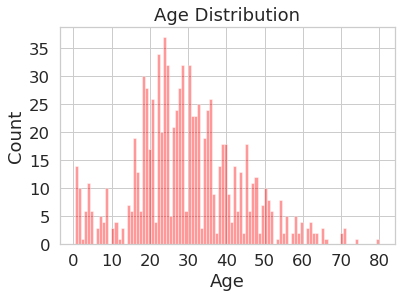

In [74]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(tdata["Age"].dropna(),
                 bins=100,
                 kde=False,
                 color="red")
    plt.title("Age Distribution")
    plt.ylabel("Count");

In [75]:
ttest = fill_missing_age(ttest)

AttributeError: module 'seaborn' has no attribute 'plt'

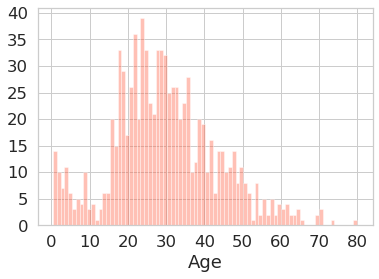

In [76]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(tdata["Age"].dropna(),
                 bins=80,
                 kde=False,
                 color="tomato")
    sns.plt.title("Age Distribution")
    plt.ylabel("Count")
    plt.xlim((15,100));

In [77]:
tdata.corr()['Survived']

PassengerId    -0.005007
Survived        1.000000
Pclass         -0.338481
Sex            -0.543351
Age            -0.078178
SibSp          -0.035322
Parch           0.081629
Fare            0.257307
Embarked       -0.174199
Deck           -0.301116
FamilySize      0.016639
FsizeD          0.283810
NameLength      0.332350
NlengthD       -0.312234
Titles         -0.074812
TicketNumber   -0.096161
Name: Survived, dtype: float64

In [78]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(tdata[['Age', 'Fare']])
tdata[['Age', 'Fare']] = std_scale.transform(tdata[['Age', 'Fare']])


std_scale = preprocessing.StandardScaler().fit(ttest[['Age', 'Fare']])
ttest[['Age', 'Fare']] = std_scale.transform(ttest[['Age', 'Fare']])

In [79]:
tdata.corr()['Survived']

PassengerId    -0.005007
Survived        1.000000
Pclass         -0.338481
Sex            -0.543351
Age            -0.078178
SibSp          -0.035322
Parch           0.081629
Fare            0.257307
Embarked       -0.174199
Deck           -0.301116
FamilySize      0.016639
FsizeD          0.283810
NameLength      0.332350
NlengthD       -0.312234
Titles         -0.074812
TicketNumber   -0.096161
Name: Survived, dtype: float64

In [80]:
y = tdata.Survived
fea = ['Pclass','Sex','SibSp','Parch','Fare','Age','Embarked','NlengthD','FsizeD','Titles','Deck']
X = tdata[fea]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
tmodel = DecisionTreeRegressor(max_leaf_nodes=1000,random_state = 1)
tmodel.fit(X, y)
tmodel.score(X,y)


0.9857635893011216

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

In [105]:
from sklearn import metrics
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
tmodel1 = RandomForestClassifier(oob_score=True,random_state=1)
tmodel1.fit(X, y)

tmodel1.score(X,y)


0.7668161434977578

In [83]:
X_test = ttest[fea]
predictions = tmodel1.predict(X_test).astype(int)
submission = pd.DataFrame({'PassengerId':ttest['PassengerId'],'Survived':predictions})
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [84]:
filename = 'Titanic Predictions 5.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: Titanic Predictions 5.csv
